In [24]:
import gc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
df_events = pd.read_parquet('data/add_event.parquet', engine="pyarrow")

In [3]:
df_events.head()

,id2,id3,id6,id4,id7
0,2431360,618619,Tiles,2023-10-22 08:08:17.768,None
1,2431360,363153,Tiles,2023-10-22 08:08:18.921,None
2,2431360,97193,Tiles,2023-10-22 08:08:17.765,None
3,2431360,654444,Tiles,2023-10-22 08:08:17.737,None
4,2431360,32325,Tiles,2023-10-22 08:08:17.812,None


In [6]:
df_offers = pd.read_parquet('data/offer_metadata.parquet', engine="pyarrow")

In [7]:
df_offers.head()

,id3,id9,f375,f376,f377,id10,id11,f378,f374,id8,id12,id13
0,70687,FO5O,2,5.0,None,1,None,N,None,None,2018-01-01 00:00:00,2099-12-31 23:59:59
1,900002526,UGE,2,100.0,None,1,None,N,None,None,2014-10-20 00:00:00,2099-12-31 23:59:59
2,900002864,UTP,1,100.0,None,1,None,N,None,None,2016-07-19 00:00:00,2099-12-31 23:59:59
3,19508,o,2,NaN,None,1,None,N,None,None,2019-06-02 17:00:00,2028-12-31 16:59:59
4,35903,o,2,NaN,None,1,None,N,None,None,2019-06-02 17:00:00,2028-12-31 16:59:59


In [8]:
df_train = pd.read_parquet('data/train_data.parquet', engine="pyarrow")

In [9]:
df_train.head()

,id1,id2,id3,id4,id5,y,f1,f2,f3,f4,...,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366
0,1366776_189706075_16-23_2023-11-02 22:22:00.042,1366776,189706075,2023-11-02 22:22:00.042,2023-11-02,0,1.0,None,None,None,...,None,-9999.0,0.0,None,28.0,0.0,0.0,337.0,0.0,0.0
1,1366776_89227_16-23_2023-11-01 23:51:24.999,1366776,89227,2023-11-01 23:51:24.999,2023-11-01,0,1.0,None,None,None,...,None,None,0.0,None,87.0,0.0,0.0,1010.0,2.0,0.0019801980198019
2,1366776_35046_16-23_2023-11-01 00:30:59.797,1366776,35046,2023-11-01 00:30:59.797,2023-11-01,0,1.0,None,None,None,...,None,None,0.0,None,23.0,0.0,0.0,1010.0,2.0,0.0019801980198019
3,1366776_6275451_16-23_2023-11-02 22:21:32.261,1366776,6275451,2023-11-02 22:21:32.261,2023-11-02,0,1.0,None,None,None,...,None,-9999.0,0.0,None,277.0,1.0,0.003610108303249,337.0,0.0,0.0
4,1366776_78053_16-23_2023-11-02 22:21:34.799,1366776,78053,2023-11-02 22:21:34.799,2023-11-02,0,1.0,None,None,None,...,None,-9999.0,0.0,None,359.0,0.0,0.0,337.0,0.0,0.0


In [10]:
df_dict = pd.read_csv('data/data_dictionary.csv')

In [11]:
df_dict.head()

,masked_column,Description,Type
0,id1,Primary Key(masked),Key
1,id2,Customer ID (masked),-
2,id3,Offer ID,Categorical
3,id4,Event timestamp,Numerical
4,id5,Event Date,Numerical


In [12]:
df_test = pd.read_parquet('data/test_data.parquet', engine="pyarrow")

In [13]:
df_test.head()

,id1,id2,id3,id4,id5,f1,f2,f3,f4,f5,...,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366
46756,1362907_91950_16-23_2023-11-04 18:56:26.000794,1362907,91950,2023-11-04 18:56:26.000794,2023-11-04,None,None,None,None,None,...,0.0027807272790246,0.0465999838670646,0.0,None,1.0,0.0,0.0,56.0,0.0,0.0
57819,1082599_88356_16-23_2023-11-04 06:08:53.373,1082599,88356,2023-11-04 06:08:53.373,2023-11-04,None,9.0,None,None,None,...,0.0014287946777398,0.0603093514970909,0.0,None,195.0,13.0,0.0666666666666666,None,None,None
15390,1888466_958700_16-23_2023-11-05 10:07:28.000725,1888466,958700,2023-11-05 10:07:28.000725,2023-11-05,None,None,None,None,22.0,...,-0.0174961119751166,0.0734836702954899,0.0,None,155.0,67.0,0.432258064516129,1142.0,436.0,0.3817863397548161
145730,1888971_795739_16-23_2023-11-04 12:25:28.244,1888971,795739,2023-11-04 12:25:28.244,2023-11-04,None,None,None,None,None,...,0.0013159476327096,0.040572039549215,0.0,None,None,None,None,None,None,None
146085,1256369_82296_16-23_2023-11-05 06:45:26.657,1256369,82296,2023-11-05 06:45:26.657,2023-11-05,None,None,None,None,None,...,0.0020541699799278,0.038243539079214,0.0,None,29.0,2.0,0.0689655172413793,361.0,3.0,0.0083102493074792


In [14]:
df_train['id4'] = pd.to_datetime(df_train['id4'])
df_test['id4'] = pd.to_datetime(df_test['id4'])
df_train['id5'] = pd.to_datetime(df_train['id5'])
df_test['id5'] = pd.to_datetime(df_test['id5'])

In [15]:
for df in [df_train, df_test]:
    df['hour'] = df['id4'].dt.hour
    df['dayofweek'] = df['id4'].dt.dayofweek
    df['day'] = df['id4'].dt.day
    df['month'] = df['id4'].dt.month
    df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)

In [16]:
# Season encoded (Spring = 0, Summer = 1, etc.)
def season_from_month(m):
    return (m % 12 + 3) // 3

df_train['season'] = df_train['month'].apply(season_from_month)
df_test['season'] = df_test['month'].apply(season_from_month)


In [17]:
df_offers['id13'] = pd.to_datetime(df_offers['id13'])  # End Timestamp
df_offers['id12'] = pd.to_datetime(df_offers['id12'])  # Start Timestamp

In [37]:
cols_to_drop = []
for col in df_train.columns:
    unique_vals = df_train[col].dropna().unique()
    nunique = df_train[col].nunique(dropna=True)
    if nunique < 10:
        print(f"Column {col} : {unique_vals.tolist()} ")
    if nunique == 1 or set(unique_vals).issubset({0.0}):
        cols_to_drop.append(col)
        print(f"Marking column {col} for drop")

df_train.drop(columns=cols_to_drop, inplace=True)
df_test.drop(columns=cols_to_drop, inplace=True)

print(f"Dropped {len(cols_to_drop)} columns")
print(f"Df_train shape: {df_train.shape}")


Column y : ['0', '1'] 
Column f13 : ['3.0', '4.0', '1.0', '5.0', '2.0', '6.0', '9.0'] 
Column f14 : ['0.0'] 
Marking column f14 for drop
Column f15 : ['0.0'] 
Marking column f15 for drop
Column f16 : ['0.0'] 
Marking column f16 for drop
Column f17 : ['0.0'] 
Marking column f17 for drop
Column f18 : ['1.0', '0.0'] 
Column f19 : ['0.0'] 
Marking column f19 for drop
Column f20 : ['0.0'] 
Marking column f20 for drop
Column f21 : ['0.0'] 
Marking column f21 for drop
Column f23 : ['0.0'] 
Marking column f23 for drop
Column f24 : ['0.0'] 
Marking column f24 for drop
Column f25 : ['0.0'] 
Marking column f25 for drop
Column f34 : ['1.0', '4.0', '2.0', '3.0', '7.0'] 
Column f42 : ['R', 'G', 'P', 'S'] 
Column f48 : ['4.0', '3.0', '2.0', '1.0'] 
Column f50 : ['Y', 'N'] 
Column f52 : ['N', 'Y'] 
Column f53 : ['NY', 'NN'] 
Column f54 : ['F', 'A', 'D', 'E', 'C', 'B'] 
Column f56 : ['G', 'B', 'S', 'D'] 
Column f57 : ['H', 'P', 'A', 'Z'] 
Column f62 : ['0.0'] 
Marking column f62 for drop
Column f66 : [

In [18]:
df_train['id3'] = df_train['id3'].astype(str)
df_offers['id3'] = df_offers['id3'].astype(str)

In [19]:
import pandas as pd
# Define the parsing function
def classify_offering_body(body):
    if pd.isna(body) or body == 'N':
        return {'offer_type': 'missing','source': None,'segment': None,'details': None,'tag': None}
    parts = body.split('$')
    count = len(parts) - 1

    if count == 2:
        return {'offer_type': 'standard','source': parts[0],'segment': parts[1],'details': parts[2],'tag': None}
    elif count == 3:
        return {'offer_type': 'extended','source': parts[0],'segment': parts[1],'details': parts[2],'tag': parts[3]}
    else:
        return {
            'offer_type': 'unstructured',
            'source': None,
            'segment': None,
            'details': body,
            'tag': None
        }

parsed = df_offers['f378'].apply(classify_offering_body)
parsed_df = pd.DataFrame(parsed.tolist())
df_offers = pd.concat([df_offers, parsed_df], axis=1)
df_offers

,id3,id9,f375,f376,f377,id10,id11,f378,f374,id8,id12,id13,offer_type,source,segment,details,tag
0,70687,FO5O,2,5.0,None,1,None,N,None,None,2018-01-01 00:00:00,2099-12-31 23:59:59,missing,None,None,None,None
1,900002526,UGE,2,100.0,None,1,None,N,None,None,2014-10-20 00:00:00,2099-12-31 23:59:59,missing,None,None,None,None
2,900002864,UTP,1,100.0,None,1,None,N,None,None,2016-07-19 00:00:00,2099-12-31 23:59:59,missing,None,None,None,None
3,19508,o,2,NaN,None,1,None,N,None,None,2019-06-02 17:00:00,2028-12-31 16:59:59,missing,None,None,None,None
4,35903,o,2,NaN,None,1,None,N,None,None,2019-06-02 17:00:00,2028-12-31 16:59:59,missing,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4159,63853,TGAB,2,100.0,None,1,None,N,None,None,2019-09-26 00:00:00,2099-12-31 23:59:59,missing,None,None,None,None
4160,91140,TPAB2,2,100.0,None,1,None,N,None,None,2019-09-26 00:00:00,2099-12-31 23:59:59,missing,None,None,None,None
4161,71234,C-DET4,1,NaN,None,1,None,N,None,None,2023-01-18 00:00:00,2024-06-30 23:59:59,missing,None,None,None,None
4162,72178,C-DET6,1,NaN,None,1,None,N,Grocery Stores,54110000,2023-07-24 00:00:00,2024-06-30 23:59:59,missing,None,None,None,None


In [ ]:
df_train = df_train.merge(df_offers[['id3', 'offer_type', 'source', 'segment', 'details', 'tag', 'f374', 'f375','id10']], on='id3', how='left')
print(df_train.shape)
df_test = df_test.merge(df_offers[['id3', 'offer_type', 'source', 'segment', 'details', 'tag', 'f374', 'f375','id10']], on='id3', how='left')
print(df_test.shape)

(770164, 386)
(369301, 385)


In [21]:
df_train = df_train.merge(df_offers[['id3', 'id12', 'id13']], on='id3', how='left')
df_test = df_test.merge(df_offers[['id3', 'id12', 'id13']], on='id3', how='left')


In [23]:
df_train['is_offer_active'] = ((df_train['id4'] >= df_train['id12']) & (df_train['id4'] <= df_train['id13'])).astype(int)
df_test['is_offer_active'] = ((df_test['id4'] >= df_test['id12']) & (df_test['id4'] <= df_test['id13'])).astype(int)

In [25]:
df_train.drop(columns=['id4', 'id5', 'id12', 'id13'], inplace=True, errors='ignore')
df_test.drop(columns=['id4', 'id12', 'id13'], inplace=True, errors='ignore')

In [26]:
df_events['id7'] = pd.to_datetime(df_events['id7'], errors='coerce')
df_events['is_clicked'] = df_events['id7'].notna().astype(int)

offer_ctr = df_events.groupby('id3').agg(
    impressions=('id4', 'count'),
    clicks=('is_clicked', 'sum'),
).reset_index()

offer_ctr['ctr'] = offer_ctr['clicks'] / offer_ctr['impressions']


In [27]:
del df_events
gc.collect()

0

In [28]:
df_offers['id3'] = df_offers['id3'].astype(str)
offer_ctr['id3'] = offer_ctr['id3'].astype(str)

# Merge CTR
df_offers = df_offers.merge(offer_ctr[['id3', 'ctr', 'impressions', 'clicks']], on='id3', how='left')

In [29]:
df_train = df_train.merge(df_offers[['id3', 'ctr', 'impressions', 'clicks']], on='id3', how='left')
df_test = df_test.merge(df_offers[['id3', 'ctr', 'impressions', 'clicks']], on='id3', how='left')

# Fill NA with 0 where appropriate
for col in ['ctr', 'impressions', 'clicks']:
    df_train[col] = df_train[col].fillna(0)
    df_test[col] = df_test[col].fillna(0)

In [30]:
# df_train.fillna(-9999, inplace=True)
# df_test.fillna(-9999, inplace=True)   

In [31]:
del df_offers
gc.collect()

0

In [32]:
df_train.head()

,id1,id2,id3,y,f1,f2,f3,f4,f5,f6,...,segment,details,tag,f374,f375,id10,is_offer_active,ctr,impressions,clicks
0,1366776_189706075_16-23_2023-11-02 22:22:00.042,1366776,189706075,0,1.0,None,None,None,None,None,...,None,g2baascbuyeectmpoanb1lo$bitscst,None,"Radio, Television, And Consumer Electronics St...",2.0,1,1,0.059875,18238.0,1092.0
1,1366776_89227_16-23_2023-11-01 23:51:24.999,1366776,89227,0,1.0,None,None,None,None,None,...,scbuyeectsamo,ioompoawb4lo1sc(o,st,Liquor Stores,2.0,1,1,0.046487,20780.0,966.0
2,1366776_35046_16-23_2023-11-01 00:30:59.797,1366776,35046,0,1.0,None,None,None,None,None,...,None,g1baascbuyeectmpoatb1lo$bitscst,None,Beauty Shops,2.0,1,1,0.041484,18296.0,759.0
3,1366776_6275451_16-23_2023-11-02 22:21:32.261,1366776,6275451,0,1.0,None,None,None,None,None,...,None,g1baascbuyeectmpoadb1lo$bitscst,None,Family Clothing Stores,2.0,1,1,0.042805,18012.0,771.0
4,1366776_78053_16-23_2023-11-02 22:21:34.799,1366776,78053,0,1.0,None,None,None,None,None,...,None,g8baascbuyeectmpoaeb1lo$bitscst,None,"Miscellaneous Retail Stores, Nec",2.0,1,1,0.042544,18428.0,784.0


In [33]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

c:\Users\91820\AppData\Local\Programs\Python\Python312\Lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [34]:
def mapk(actual, predicted, k=7):
    """
    actual: list of lists, each containing true clicked offer_id3 (strings)
    predicted: list of lists, each containing predicted offer_id3 (strings), ranked
    """
    def apk(a, p, k):
        if len(p) > k:
            p = p[:k]
        score = 0.0
        num_hits = 0.0
        for i, pred in enumerate(p):
            if pred in a and pred not in p[:i]:
                num_hits += 1.0
                score += num_hits / (i + 1.0)
        return score / min(len(a), k)

    return np.mean([apk(a, p, k) for a, p in zip(actual, predicted)])

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770164 entries, 0 to 770163
Columns: 388 entries, id1 to clicks
dtypes: float64(4), int32(6), int64(1), object(377)
memory usage: 2.2+ GB


In [36]:
df_dict['Type'].unique()

array(['Key', '-', 'Categorical', 'Numerical', 'Label', 'One hot encoded'],
      dtype=object)

In [ ]:
categorical_features = df_dict[df_dict['Type'].isin(['Categorical', 'One hot encoded'])]['masked_column'].tolist()
categorical_features = [col for col in categorical_features if (col in df_train.columns and col!= 'id3')]
print("Categorical features:")
print(categorical_features)
# remove id3 from categorical features

Categorical features:
['f42', 'f48', 'f50', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f227', 'f228', 'f230', 'f231', 'f232', 'f233', 'f234', 'f235', 'f237', 'f239', 'f241', 'f242', 'f244', 'f247', 'f250', 'f251', 'f252', 'f253', 'f254', 'f255', 'f256', 'f257', 'f261', 'f263', 'f264', 'f265', 'f269', 'f272', 'f273', 'f274', 'f275', 'f276', 'f278', 'f280', 'f282', 'f283', 'f284', 'f285', 'f288', 'f289', 'f292', 'f293', 'f296', 'f297', 'f299', 'f302', 'f305', 'f306', 'f349', 'f354']


In [ ]:
# for col in categorical_features:
#     if col in df_train.columns:
#         df_train[col] = df_train[col].astype('category')
#     if col in df_test.columns:
#         df_test[col] = df_test[col].astype('category')


In [40]:
#print unique values in categorical features
for col in categorical_features:
    if col in df_train.columns:
        unique_values = df_train[col].nunique()
        print(f"Unique values in {col}: {unique_values}")

Unique values in f42: 4
Unique values in f48: 4
Unique values in f50: 2
Unique values in f52: 2
Unique values in f53: 2
Unique values in f54: 6
Unique values in f55: 10
Unique values in f56: 4
Unique values in f57: 4
Unique values in f227: 2
Unique values in f228: 2
Unique values in f230: 2
Unique values in f231: 2
Unique values in f232: 2
Unique values in f233: 2
Unique values in f234: 2
Unique values in f235: 2
Unique values in f237: 2
Unique values in f239: 2
Unique values in f241: 2
Unique values in f242: 2
Unique values in f244: 2
Unique values in f247: 2
Unique values in f250: 2
Unique values in f251: 2
Unique values in f252: 2
Unique values in f253: 2
Unique values in f254: 2
Unique values in f255: 2
Unique values in f256: 2
Unique values in f257: 2
Unique values in f261: 2
Unique values in f263: 2
Unique values in f264: 2
Unique values in f265: 2
Unique values in f269: 2
Unique values in f272: 2
Unique values in f273: 2
Unique values in f274: 2
Unique values in f275: 2
Unique v

In [41]:
# def frequency_encode(df_train, df_test, column):
#     freq = df_train[column].value_counts()
#     df_train[column + "_freq"] = df_train[column].map(freq)
#     df_test[column + "_freq"] = df_test[column].map(freq).fillna(0)
#     return df_train, df_test

# df_train, df_test = frequency_encode(df_train, df_test, 'id3')
# df_train.drop(['id3'],inplace=True)

In [42]:
numerical_cols = df_dict.loc[df_dict['Type'] == 'Numerical', 'masked_column'].tolist()

# Filter only columns that actually exist in the data
numerical_cols = [col for col in numerical_cols if col in df_train.columns]

# Convert to float32
df_train[numerical_cols] = df_train[numerical_cols].astype('float32')
df_test[numerical_cols] = df_test[numerical_cols].astype('float32')
print(f"Converted {len(numerical_cols)} numerical columns to float32.")


Converted 243 numerical columns to float32.


In [43]:
# Get one-hot encoded columns from dict
one_hot_cols = df_dict.loc[df_dict['Type'] == 'One hot encoded', 'masked_column'].tolist()
one_hot_cols = [col for col in one_hot_cols if col in df_train.columns]

for col in one_hot_cols:
    df_train[col] = pd.to_numeric(df_train[col], errors='coerce').fillna(0).astype('uint8')
    df_test[col] = pd.to_numeric(df_test[col], errors='coerce').fillna(0).astype('uint8')

print(f"Converted {len(one_hot_cols)} one-hot encoded columns to uint8.")


Converted 48 one-hot encoded columns to uint8.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=20, random_state=42)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=7, random_state=42, n_init='auto')
df_train['customer_cluster'] = kmeans.fit_predict(X_pca)

In [ ]:
# STEP 6: Apply KMeans Pipeline to Test Set

# 1. Extract the same clean numerical columns
numeric_f_test = df_test[f_cols_clean].copy()
numeric_f_test = numeric_f_test.apply(pd.to_numeric, errors='coerce')
numeric_f_test = numeric_f_test.dropna(axis=1, how='all')  # Drops cols with all NaN
# 2. Impute missing numeric values (use fit from train)
numeric_test_imputed = pd.DataFrame(
    num_imputer.transform(numeric_f_test),
    columns=numeric_f_test.columns,
    index=df_test.index
)

# 3. If you also used categorical features in clustering:
categorical_f_test = df_test[categorical_f.columns].copy()
categorical_test_imputed = pd.DataFrame(
    cat_imputer.transform(categorical_f_test),
    columns=categorical_f_test.columns,
    index=df_test.index
)

categorical_test_encoded = pd.DataFrame(
    encoder.transform(categorical_test_imputed),
    columns=encoder.get_feature_names_out(categorical_f_test.columns),
    index=df_test.index
)

# 4. Combine
X_test_final = pd.concat([numeric_test_imputed, categorical_test_encoded], axis=1)

# 5. Scale + PCA
X_test_scaled = scaler.transform(X_test_final)
X_test_pca = pca.transform(X_test_scaled)

# 6. Predict cluster
df_test['customer_cluster'] = kmeans.predict(X_test_pca)

In [44]:
drop_cols = ['id1', 'id4', 'id5', 'y'] if 'id4' in df_train.columns else ['id1', 'id5', 'y']
features = df_train.drop(columns=drop_cols, errors='ignore').columns

# Split for local validation (optional but useful)
X_train, X_val, y_train, y_val = train_test_split(
    df_train[features], df_train['y'], test_size=0.2, random_state=42, stratify=df_train['y']
)   

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770164 entries, 0 to 770163
Columns: 322 entries, id1 to clicks
dtypes: category(11), float32(243), float64(4), int32(4), object(12), uint8(48)
memory usage: 863.0+ MB


In [46]:
print(dir())

['In', 'Out', 'X_train', 'X_val', '_', '_11', '_13', '_19', '_22', '_27', '_3', '_31', '_32', '_36', '_7', '_9', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '__vsc_ipynb_file__', '_dh', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i20', '_i21', '_i22', '_i23', '_i24', '_i25', '_i26', '_i27', '_i28', '_i29', '_i3', '_i30', '_i31', '_i32', '_i33', '_i34', '_i35', '_i36', '_i37', '_i38', '_i39', '_i4', '_i40', '_i41', '_i42', '_i43', '_i44', '_i45', '_i46', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'categorical_features', 'classify_offering_body', 'col', 'cols_to_drop', 'df', 'df_dict', 'df_test', 'df_train', 'drop_cols', 'exit', 'features', 'gc', 'get_ipython', 'lgb', 'log_loss', 'mapk', 'np', 'numerical_cols', 'nunique', 'offer_ctr', 'one_hot_cols', 'open', 'os', 'parsed', 'parsed_df', 'pd', 'plt', 'quit', 'season_from_month', 'sns', 'train_test_

In [47]:
import gc
gc.collect()

0

In [48]:
print(X_train.memory_usage(deep=True).sum() / 1024**2, "MB")

942.7306690216064 MB


In [49]:
# Identify numeric-looking columns in features
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_val   = X_val.apply(pd.to_numeric, errors='coerce')


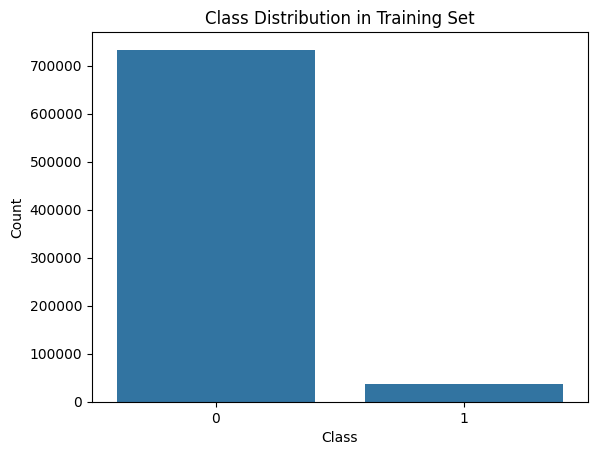

Class distribution in training set:
y
0    0.951892
1    0.048108
Name: proportion, dtype: float64


In [50]:
# I want to know the class distribution in the training set can you plot it
sns.countplot(x='y', data=df_train)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
#also print the class distribution
print("Class distribution in training set:")
print(df_train['y'].value_counts(normalize=True))


In [51]:
del df_train
del df_test

In [52]:
y_train = pd.to_numeric(y_train, errors='coerce').fillna(0).astype(int)
y_val = pd.to_numeric(y_val, errors='coerce').fillna(0).astype(int)

In [ ]:
import numpy as np
import pandas as pd

# Data split & metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score

# Imputation & PCA
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Pipelines
from sklearn.pipeline import make_pipeline

# Base learners
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

# Stacking
from sklearn.ensemble import StackingClassifier

# Meta‑learner
from lightgbm import LGBMClassifier

# ——————————————————————————————————————
# 1) Prepare raw X, y
drop_cols = ['id1', 'id4', 'id5', 'y'] if 'id4' in df_train.columns else ['id1', 'id5', 'y']
features = [c for c in df_train.columns if c not in drop_cols]

X = df_train[features]
y = df_train['y']

# 2) Train/validation split
X_tr, X_val, y_tr, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 3) Impute missing values
imp = SimpleImputer(strategy='median')
X_tr_imp = imp.fit_transform(X_tr)
X_val_imp = imp.transform(X_val)

# 4) Dimensionality reduction
pca = PCA(n_components=250, random_state=42)
X_tr_pca = pca.fit_transform(X_tr_imp)
X_val_pca = pca.transform(X_val_imp)


estimators = [
    ('xgb', XGBClassifier(
        objective='binary:logistic',
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=20,
        reg_lambda=1.0,
        reg_alpha=0.5,
        learning_rate=0.05,
        max_depth=6,
        n_estimators=500,
        random_state=42,
        tree_method='gpu_hist',          # GPU support
        predictor='gpu_predictor',
        n_jobs=1
    )),

    ('cat', CatBoostClassifier(
        iterations=500,
        learning_rate=0.05,
        depth=6,
        l2_leaf_reg=3.0,
        auto_class_weights='Balanced',
        verbose=0,
        random_state=42,
        task_type='GPU',                 # Enable GPU
        devices='0'
    )),

    ('logreg', make_pipeline(
        StandardScaler(),
        LogisticRegression(
            penalty='l2',
            C=0.5,
            class_weight='balanced',
            solver='saga',
            max_iter=5000,
            random_state=42,
            n_jobs=1                      # No GPU, only CPU
        )
    ))
]

stack_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LGBMClassifier(
        objective='binary',
        metric='binary_logloss',
        learning_rate=0.05,
        num_leaves=31,
        device='gpu',                   # LightGBM GPU support
        random_state=42,
        n_jobs=1,
        verbosity=0
    ),
    cv=3,
    stack_method='predict_proba',
    n_jobs=1,
    passthrough=False
)


print("Fitting stacked ensemble on PCA‑reduced data…")
stack_clf.fit(X_tr_pca, y_tr)

probs_val = stack_clf.predict_proba(X_val_pca)[:, 1]
auc_val = roc_auc_score(y_val, probs_val)
print(f"\nHold‑out Validation ROC‑AUC: {auc_val:.4f}")
# 9) Cross‑validated ROC‑AUC on full dataset via a pipeline
# We need to recreate a pipeline that applies imp → pca → stack_clf
full_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    PCA(n_components=200, random_state=42),
    stack_clf
)

print("Running 3‑fold CV on full pipeline…")
cv_scores = cross_val_score(
    full_pipeline,
    X, y,
    cv=3,
    scoring='roc_auc',
    n_jobs=1
)
print(f"3‑fold CV ROC‑AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


In [ ]:
params = {
    'objective': 'binary',
    'metric': ['binary_logloss', 'auc'],
    'boosting_type': 'gbdt',
    'random_state': 42,
    'learning_rate': 0.03,
    'num_leaves': 64,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbosity': 0,
    'device_type' : 'gpu',
    'scale_pos_weight': 20.0,  # Adjust based on class imbalance
}

train_data = lgb.Dataset(X_train, label=y_train,categorical_feature=categorical_features)
val_data = lgb.Dataset(X_val, label=y_val)

model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, val_data],
    num_boost_round=1000,
    callbacks=[
        # lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=50)
    ]
)

[50]	training's binary_logloss: 0.220127	training's auc: 0.950591	valid_1's binary_logloss: 0.222429	valid_1's auc: 0.939079
[100]	training's binary_logloss: 0.248418	training's auc: 0.957831	valid_1's binary_logloss: 0.251883	valid_1's auc: 0.944013
[150]	training's binary_logloss: 0.242914	training's auc: 0.963876	valid_1's binary_logloss: 0.247771	valid_1's auc: 0.947968
[200]	training's binary_logloss: 0.230795	training's auc: 0.968658	valid_1's binary_logloss: 0.237106	valid_1's auc: 0.950354
[250]	training's binary_logloss: 0.221381	training's auc: 0.972498	valid_1's binary_logloss: 0.228936	valid_1's auc: 0.95154
[300]	training's binary_logloss: 0.212765	training's auc: 0.975668	valid_1's binary_logloss: 0.221507	valid_1's auc: 0.952472
[350]	training's binary_logloss: 0.206564	training's auc: 0.978158	valid_1's binary_logloss: 0.216371	valid_1's auc: 0.952941
[400]	training's binary_logloss: 0.199821	training's auc: 0.980241	valid_1's binary_logloss: 0.210632	valid_1's auc: 0.9

In [ ]:
import matplotlib.pyplot as plt
import lightgbm as lgb

# Get feature importances
importances = model.feature_importance()
feature_names = model.feature_name()

# Put into DataFrame
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot top 50 features
feat_imp_df.head(50).plot(kind='barh', x='feature', y='importance', figsize=(10, 12))
plt.gca().invert_yaxis()
plt.title('Top 50 Feature Importances')
plt.show()


In [ ]:
selected_features = feat_imp_df[feat_imp_df['importance'] > 5]['feature'].tolist()
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
train_data_selected = lgb.Dataset(X_train_selected, label=y_train)
val_data_selected = lgb.Dataset(X_val_selected, label=y_val)

model = lgb.train(
    params,
    train_data_selected,
    valid_sets=[train_data_selected, val_data_selected],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=50)
    ]
)

In [ ]:
df_test

In [ ]:
df_test[features] = df_test[features].apply(pd.to_numeric, errors='coerce')
df_test[features] = df_test[features].fillna(-9999)

In [ ]:
df_test['click_proba'] = model.predict(df_test[features], num_iteration=model.best_iteration)

# If you want to rename 'click_proba' to 'pred'
df_test['pred'] = df_test['click_proba']

# If you want id5 as a string in the format 'M/D/YYYY' (like your sample)
df_test['id5'] = pd.to_datetime(df_test['id5']).dt.strftime('%-m/%-d/%Y')

# Keep only required columns and sort if needed
final = (
    df_test
    .sort_values(['id2', 'id5'])  # Optional: sort as you wish
    [['id1', 'id2', 'id3', 'id5', 'pred']]
    .reset_index(drop=True)
)

In [ ]:
final.to_csv('submission.csv', index=False)